In [2]:
import pandas as pd
#以下3行をprophetより先に実行
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

from fbprophet import Prophet
import os
import matplotlib.pyplot as plt 
%matplotlib inline
from tqdm import tqdm, tqdm_notebook

In [4]:
# csvの読み取り (utf-8で読み込まないとエラー)
df = pd.read_csv("AirPassengers.csv") # change_path
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#ds, y
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
#data_train = data[:100]

m = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)
m.fit(df)

#make_future_dataframeを用いることで学習データに予測したい期間を加えた時間が得られる
future = m.make_future_dataframe(periods=12,freq='M')
future.tail()

,ds
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31
155,1961-11-30


In [12]:
predict = m.predict(future)
predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.611551,56.593549,115.849435,106.611551,106.611551,-20.309322,-20.309322,-20.309322,1.164896,1.164896,1.164896,-21.474219,-21.474219,-21.474219,0.0,0.0,0.0,86.302229
1,1949-02-01,108.779750,44.942009,104.516147,108.779750,108.779750,-33.492862,-33.492862,-33.492862,-3.816792,-3.816792,-3.816792,-29.676069,-29.676069,-29.676069,0.0,0.0,0.0,75.286888
2,1949-03-01,110.738123,76.743562,135.203030,110.738123,110.738123,-3.752478,-3.752478,-3.752478,-3.816792,-3.816792,-3.816792,0.064314,0.064314,0.064314,0.0,0.0,0.0,106.985644
3,1949-04-01,112.906321,83.695854,140.519652,112.906321,112.906321,-0.513819,-0.513819,-0.513819,4.765707,4.765707,4.765707,-5.279526,-5.279526,-5.279526,0.0,0.0,0.0,112.392502
4,1949-05-01,115.004578,81.151610,136.681701,115.004578,115.004578,-5.030514,-5.030514,-5.030514,-1.605357,-1.605357,-1.605357,-3.425157,-3.425157,-3.425157,0.0,0.0,0.0,109.974064


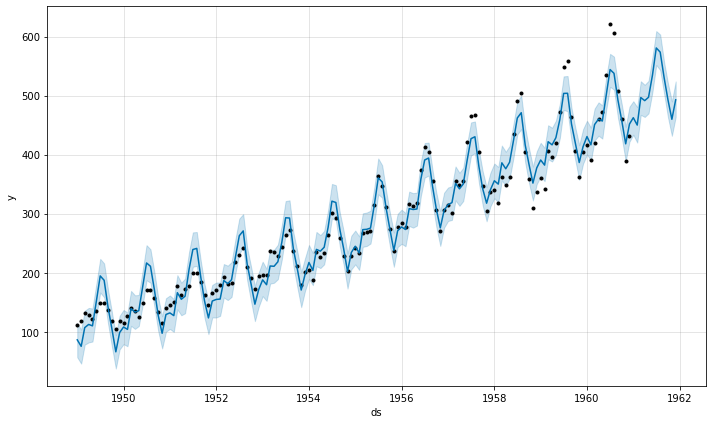

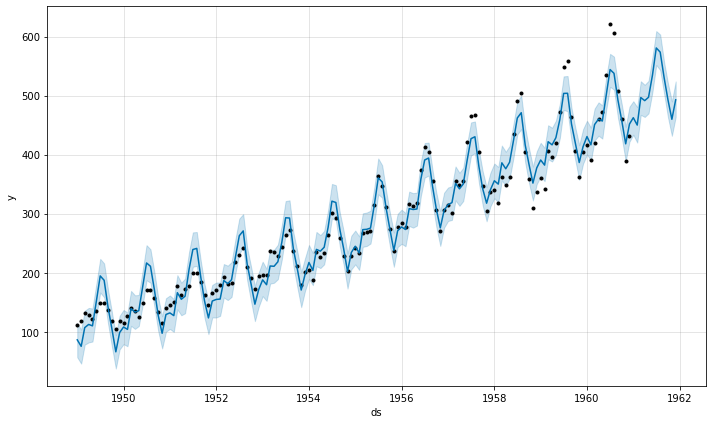

In [13]:
forecast = m.predict(future)
m.plot(forecast)

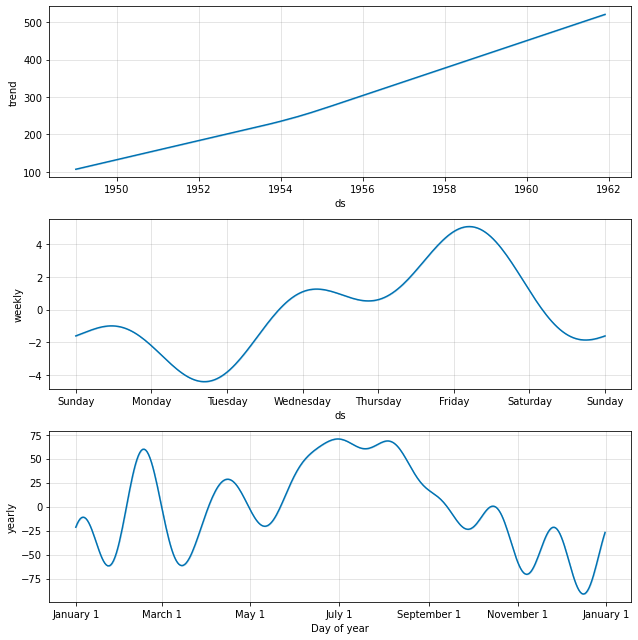

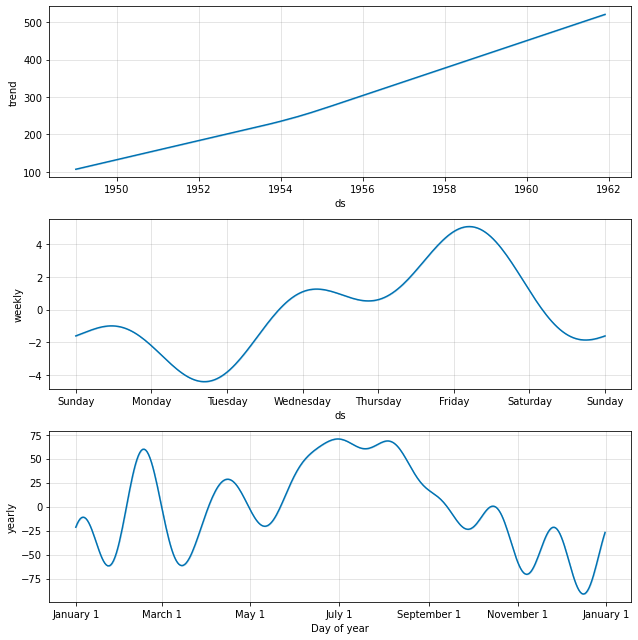

In [14]:
m.plot_components(forecast)

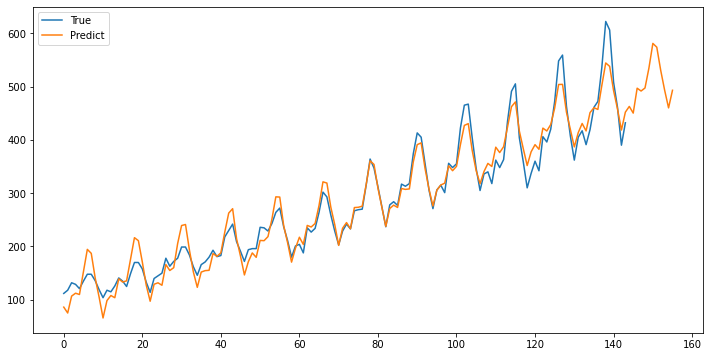

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.y,label = 'True')
plt.plot(predict.yhat,label='Predict')
plt.legend()

png, csvの保存までする

*** Program Started ***
        ds    y
0  1949-01  112
1  1949-02  118
2  1949-03  132
3  1949-04  129
4  1949-05  121
type of m <class 'fbprophet.forecaster.Prophet'>
type of future <class 'pandas.core.frame.DataFrame'>
type of forecast <class 'pandas.core.frame.DataFrame'>
*** Program Completed ***


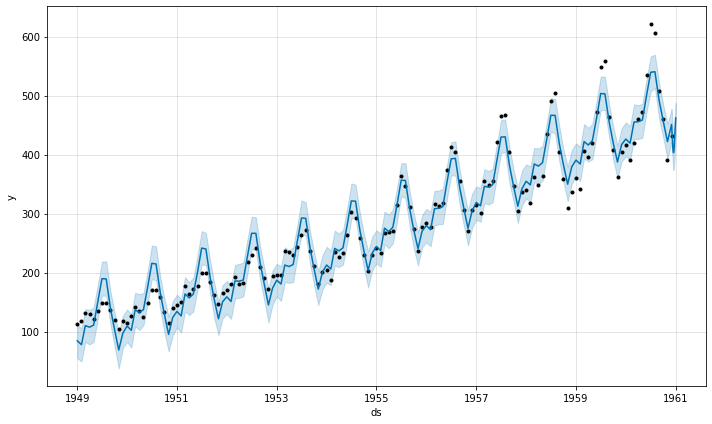

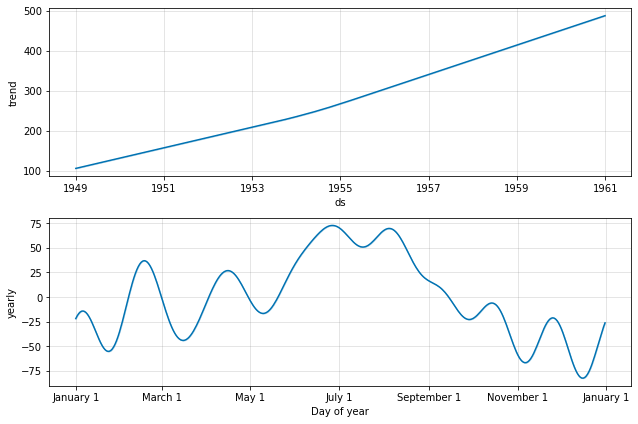

In [18]:
'''
Importing plotly failed. Interactive plots will not work.が起こり得る
'''
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
import pandas as pd
from fbprophet import Prophet
print('*** Program Started ***')
### Impoting data as pandas dataframe
df = pd.read_csv('AirPassengers.csv')

df.columns = ['ds','y']
print(df.head())

### Initiating new object Prophet & initiating fit method and passing input dataframe. Fitting should take 1-5 seconds
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)#yearly_seasonality=True, daily_seasonality=True
m.fit(df)

print("type of m" , type(m))

### Extending data to few future dates
future = m.make_future_dataframe(periods=30)
print("type of future" , type(future))


### The predict method will assign each row in future a predicted value which it names yhat
forecast = m.predict(future)
print("type of forecast" , type(future))
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

### Plotting forecast
fig1 = m.plot(forecast)
# fig1.show()
fig1.savefig('01_fbprophet_getting_started-01.png')

### Plotting forecast components
fig2 = m.plot_components(forecast)
fig2.savefig('01_fbprophet_getting_started-02.png')

### Saving output excel
forecast.to_csv('example_wp_log_output.csv', sep=',')

print('*** Program Completed ***')